Vous allez maintenant mettre en oeuvre l'utilisation de l'écart normalisé et de la régression linéaire pour comparer les valeurs expérimentales avec la valeur théorique.

# (TP) Utilisation d'une régression linéaire. (1h)
Vous allez utiliser les cellules suivantes pour réaliser une régression linéaire à partir de la relation $d = c \Delta t$. Vous devrez :
* Vérifier la compatibilité avec le modèle linéaire par régression linéaire et tracé graphique (pensez aux écarts normalisés)
* Estimer ainsi la célérité et son incertitude au moyen d'une simulation de Monte-Carlo sur la régression linéaire.
* Comparer la valeur estimée aux attentes.

Pensez à regarder aussi [l'exemple complet](https://pcsi3physiquestan.github.io/tp_incertitude/notebook/exemple.html) pour comprendre.

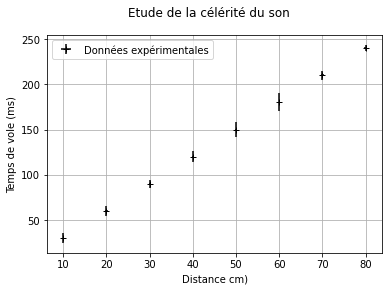

In [1]:
"""
------- MODULES UTILES -----------
Les bibliothèques utiles sont déjà importées.
"""
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

"""
------- DONNEES EXPERIMENTALES -----------
Pensez à changer les valeurs des données expérimentales. Les suivantes sont fictives
"""

d = np.array([10, 20, 30, 40, 50, 60, 70, 80])  # Liste des distances E-R (en cm - évitez les nombres trop petits)
ud = np.array([0.15, 0.26, 0.16, 0.26, 0.14, 0.12, 0.41, 0.32])  # Liste des incertitudes sur d
dt = np.array([30, 60, 90, 120, 150, 180, 210, 240])  # Liste des temps de vol (en ms)
udt = np.array([5.4, 5.8, 4.6, 6.3, 8.3, 10, 5.1, 3.2])  # Liste des incertitudes sur Delta t

"""
------- LOI COMPATIBLE A L'OEIL -----------
Le tracé a déjà été réalisé précédemment. On donne cette fois le code
"""
f, ax = plt.subplots()
f.suptitle('Etude de la célérité du son')
ax.set_xlabel("Distance cm)")
ax.set_ylabel("Temps de vole (ms)")

ax.errorbar(d, dt, xerr=ud, yerr=udt, label="Données expérimentales", marker="+", linestyle="", color="black")

ax.grid()
ax.legend()
plt.show()

_Vérifiez que l'hypothèse d'une loi linéaire est plausible._

In [2]:
"""
------- AJUSTEMENT LINEAIRE -----------
Vous devez réaliser un ajustement linéaire et en déduire une valeur des paramètres
(pente et ordonnées à l'origine) AVEC LEUR INCERTITUDE par méthode de Monte-Carlo.
La majeure partie du code est donnée.
"""
N = 10000
n_bin = len(d)  # Nombre de binômes

""" SIMULATION DES ECHANTILLONS
On crée directement des tableaux de N*k échantillons simulés pour d et dt
"""
k = len(d)
d_sim = rd.uniform(-ud, ud, (N, k))
dt_sim = rd.uniform(-udt, udt, (N, k))

""" REGRESSIONS LINEAIRES
Réalisation des N régressions linéaires au moyen d'une boucle
"""
c_sim = []  # On stockera les célérité dans cette liste.
ordo_sim = []  # On conserve aussi les ordonnées à l'origine
for j in range(N): On parcourt les N échantillons
    d_e = d_sim[j]  # Sélection des distances simulées
    dt_e = dt_sim[j]  # Sélection des temps de vol simulés
    par_e = np.polyfit(d_e, dt_e, 1)  # Régression linéaire
    c_e = 1 / par_e[0]  # La célérité est l'inverse de la pente
    ordo_e = par_e[1]  # Ordonnée à l'origine
    c_sim.append(c_e)  # Ajout de la célérité à la liste des valeurs simulées de c
    ordo_sim.append(ordo_e)  # Ajout de l'ordonnée à l'origine

""" -------------------------------------------------------
A VOUS DE CODER : Détermination des valeurs utiles
"""
c_m = 0  # Ecrire ici l'instruction permettant d'avoir la célérité estimée à partir de c_sim
c_u = 0  # Ecrire ici l'instruction permettant d'avoir l'incertitude sur la célérité estimée à partir de c_sim
ordo_m = 0  # Ecrire ici l'instruction permettant d'avoir l'ordonnée à l'origine estimée à partir de ordo_sim
ordo_u = 0  # Ecrire ici l'instruction permettant d'avoir son incertitude à partir de ordo_sim

""" FIN DE LA PARTIE A MODIER """

# Affichage des grandeurs.
print("c =" + str(c_m))
print("u(c) =" + str(c_u))
print("ordo =" + str(ordo_m))
print("u(ordo) =" + str(ordo_u))

SyntaxError: invalid syntax (Temp/ipykernel_17008/948194908.py, line 22)

_Réfléchir à l'utilisation possible de l'ordonnée à l'origine._

In [ ]:
"""
------- TEST DE COMPATIBILITE DU MODELE -----------
1. Vérifier par un tracé graphique que la droite ajustée passe par les croix d'incertitude
2. Vérifier par un tracé graphique que tous les écarts normalisés entre
les valeurs expérimentales et les valeurs ajustées sont inférieurs à 2
"""

# COMPATIBILITE A L'OEIL
# On redonne les instructions pour le tracé des points de mesures expérimentales
f, ax = plt.subplots()
f.suptitle('Etude de la célérité du son')
ax.set_xlabel("Distance cm)")
ax.set_ylabel("Temps de vole (ms)")

ax.errorbar(d, dt, xerr=ud, yerr=udt, label="Données expérimentales", marker="+", linestyle="", color="black")

""" --------------------------------
A VOUS DE CODER
"""
dt_aju = 0  # Obtenir les valeurs ajustées des temps de vol à partir de d_sim, c_m et ordo_m
# Ecrire ici l'instruction ajoutant le tracé de la droite ajustée à partir de dt_aju et d_sim.


""" FIN DE LA PARTIE A MODIFIER """

ax.grid()
ax.legend()
plt.show()


# ----------------------------------------------------------------------------
# ECARTS NORMALISES (on supposera les valeurs ajustées sans incertitude pour simplifier)
"""
A VOUS DE CODER
"""
en_s = 0  # Ecrire l'instruction permettant de calculer les écarts normalisés entre valeurs ajustées et valeurs expérimentales

print(en_s)  # Vérifier la compatibilité du modèle.


# Si le temps le permet, tracer les écarts normalisés en fonction de la distance.

In [ ]:
"""
------- TEST DE COMPATIBILITE DE C -----------
Vérifier par un calcul d'écart normalisé que la valeur estimée de la célérité
est compatible avec les données théoriques.
"""